<a href="https://colab.research.google.com/github/shreya3134/deep_learning/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv('churn_data.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
data.drop('customerID',axis='columns',inplace=True)
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [16]:
data.shape

(7043, 20)

In [13]:
data.TotalCharges.values #correct data EG- converting string data to numeric data & eliminating blank spaces

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull() #checking for blank spaces

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [15]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()] #these many rows have null values i.e TotalCharges column

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
data.iloc[6754] #TotalCharges blank

,6754
gender,Male
SeniorCitizen,0
Partner,No
Dependents,Yes
tenure,0
PhoneService,Yes
MultipleLines,Yes
InternetService,DSL
OnlineSecurity,Yes
OnlineBackup,Yes


In [18]:
df=data[data.TotalCharges!=' '] #removing blank spaces
df.shape

(7032, 20)

In [21]:
df.TotalCharges=pd.to_numeric(df.TotalCharges) #converting to numeric data
df.TotalCharges.dtypes
df.dtypes

<ipython-input-21-b40a7c76efe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges=pd.to_numeric(df.TotalCharges) #converting to numeric data


,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


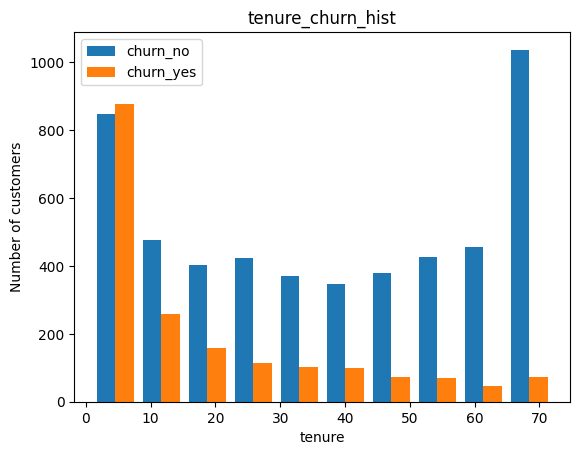

In [31]:
churn_no=df[df.Churn=='No'].tenure
churn_yes=df[df.Churn=='Yes'].tenure

plt.hist([churn_no,churn_yes],label=['churn_no','churn_yes'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('tenure_churn_hist')
plt.show()

Text(0.5, 1.0, 'Customer_churn_hist_for_prediction')

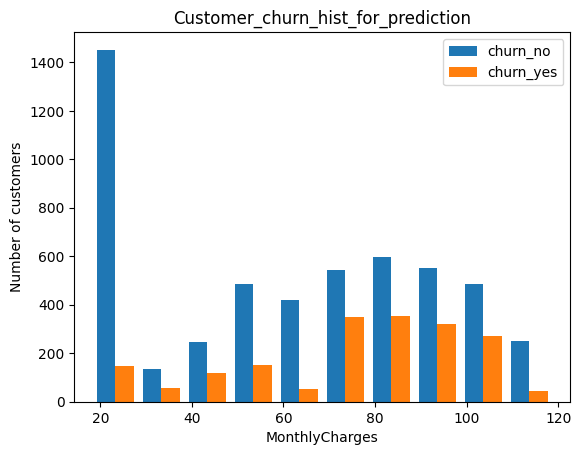

In [32]:
cust_churn_no=df[df.Churn=='No'].MonthlyCharges
cust_churn_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.hist([cust_churn_no,cust_churn_yes],label=['churn_no','churn_yes'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of customers')
plt.title('Customer_churn_hist_for_prediction')

In [35]:
def print_unique_values(df):
  for column in df:
    if df[column].dtypes==object:
      print(f'{column}:{df[column].unique()}')

In [59]:
print_unique_values(df)

Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [82]:
y_n_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
          'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for cols in y_n_cols:
            df[cols].replace({'Yes':1,'No':0},inplace=True)

<ipython-input-82-bb3d2f80a29c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols].replace({'Yes':1,'No':0},inplace=True)


In [83]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

<ipython-input-83-1fed3bd488c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No internet service','No',inplace=True)
<ipython-input-83-1fed3bd488c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No phone service','No',inplace=True)


Converting string to numerical values using binary encoding and oneHotEncoding

In [84]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-84-7f2ac4c24de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace({'Female':1,'Male':0},inplace=True)


In [85]:
set=pd.get_dummies(data=df,columns=['InternetService','PaymentMethod','Contract'])
set.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [86]:
set.shape

(7032, 27)

Data Scaling

In [88]:
scale=['InternetService','PaymentMethod','Contract']

from sklearn.preprocessing import MinMaxScaler
sk=MinMaxScaler()
# Get a list of columns generated by get_dummies for the original columns
encoded_columns = []
for col in scale:
  encoded_columns.extend(set.columns[set.columns.str.startswith(col)])

# Use the encoded column names in the scaler
set[encoded_columns] = sk.fit_transform(set[encoded_columns])

In [89]:
set.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
6924,0,0,0,0,1,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1691,0,0,1,1,60,1,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5186,1,1,0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4271,1,0,1,1,28,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1057,1,0,0,0,10,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Train test split

In [90]:
from sklearn.model_selection import train_test_split
X=set.drop('Churn',axis='columns')
y=set['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [91]:
X_train.shape

(5625, 26)

In [92]:
X_test.shape

(1407, 26)

In [93]:
y_train.shape

(5625,)

In [94]:
X_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
5664,1,1,0,0,10,1,0,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
101,1,0,1,1,1,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2621,0,0,1,0,71,1,0,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
392,1,1,0,0,2,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1327,0,0,1,0,59,1,1,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6284 - loss: 10.3685
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7587 - loss: 0.6793
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7653 - loss: 0.6366
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 0.6587
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7837 - loss: 0.5060
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7600 - loss: 0.7809
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.6907
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7549 - loss: 0.7709
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7774 - loss: 0.6465
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7795 - loss: 0.6281


In [96]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.4991


[0.5231953263282776, 0.7853589057922363]

In [97]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[1.5053971e-01],
       [4.1507155e-01],
       [3.0088439e-04],
       [7.7511305e-01],
       [3.5443646e-01]], dtype=float32)

In [98]:
y_test[:5]

,Churn
2660,0
744,0
5579,1
64,1
3287,1


In [100]:
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [106]:
y_pred[:9]

[10]